#                                         WHO DATA for year 2021

We implemented, the paper's analysis with our addition, for the data of the countries in the year 2021.

In [1]:
%%capture
%run setup.ipynb
%run PR5_gitlab.ipynb

## Code description

We filterred the dataframe clean by the dates '2021-01-01' and '2021-12-31' and assigns the resulting dataframe to the variable pt.

Then we calculated the difference in cumulative cases and cumulative deaths between consecutive rows in the dataframe using the  `diff()` method and assigns the resulting Series to variables dc and dd, respectively. 

We then filterred the dataframe pt for the date '2021-12-31' and assigns the resulting dataframe to the variable po. Dropped the columns 'Country_code','New_cases','New_deaths' from po using the drop() method.

After changing the datatype of column 'Population' to int. We calculated cases per capita and death per capita by dividing Period_cases and Period_deaths by Population and multiplying by 100000 respectively.


In [2]:
pt=clean[clean['Date_reported'].isin(['2021-01-01','2021-12-31'])]
pt=pd.DataFrame(pt)
dc= pt['Cumulative_cases'].diff(1)
dd= pt['Cumulative_deaths'].diff(1)
pt['Period_deaths']=dd
pt['Period_cases']=dc
po=pt[pt['Date_reported']=='2021-12-31']
po=pd.DataFrame(po)
po=po.drop(columns=['Country_code','New_cases','New_deaths'], axis=1)
po['Population']=po['Population'].astype(int)
po['Cases_per_Capita']=(po['Period_cases'].div(po['Population']))*100000
po['Death_per_Capita']=(po['Period_deaths'].div(po['Population']))*100000
print(po.shape)
po.head()

(172, 10)


,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
728,2021-12-31,Afghanistan,EMRO,158059,7356,38041754,5155.0,105546.0,277.447775,13.550900
1796,2021-12-31,Albania,EURO,209516,3215,2854191,2034.0,151200.0,5297.473084,71.263626
2864,2021-12-31,Algeria,AFRO,218037,6271,43053054,3515.0,118427.0,275.072240,8.164345
3932,2021-12-31,Andorra,EURO,23122,140,77142,56.0,15073.0,19539.291177,72.593399
5000,2021-12-31,Angola,AFRO,76787,1757,31825295,1352.0,59234.0,186.122391,4.248193


In [3]:
dg.to_csv(f'{RESULTS_PATH}/data_2021.csv')

### Analyzing of the data

We created a scatter plot using the seaborn library (sns) to show the relationship between cases per capita and death per capita for different WHO regions. The x-axis represents the cases per capita and the y-axis represents the death per capita.

The `corr2()` function calculates the correlation between all parameters columns in the 'po' DataFrame, and the name of the correlation matrix is passed as the first argument.

The `SSE_plot()` function creates a plot of the sum of squared errors for different numbers of clusters for k-means clustering, using the 'Cases_per_Capita' and 'Death_per_Capita' columns from the 'po' DataFrame as the variables to be clustered, the third argument is the name of the plot. Using this graph is it possible to choose a more efficient parameter k for the number of cluster by looking at the flattering of the function.


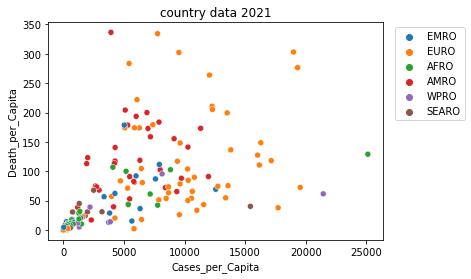

In [4]:
sns.scatterplot(x = po['Cases_per_Capita'], y = po['Death_per_Capita'], data=po, hue='WHO_region')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('country data 2021')
plt.savefig(f'{FIGURES_PATH}/data_2021_1',dpi=300)

,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
Cumulative_cases,1.000000,0.931199,0.485354,0.908785,0.996928,0.105675,0.150171
Cumulative_deaths,0.931199,1.000000,0.435442,0.988878,0.923112,0.062847,0.247010
Population,0.485354,0.435442,1.000000,0.456228,0.500582,-0.139194,-0.088387
Period_deaths,0.908785,0.988878,0.456228,1.000000,0.904941,0.049233,0.252137
Period_cases,0.996928,0.923112,0.500582,0.904941,1.000000,0.113755,0.149399
Cases_per_Capita,0.105675,0.062847,-0.139194,0.049233,0.113755,1.000000,0.576262
Death_per_Capita,0.150171,0.247010,-0.088387,0.252137,0.149399,0.576262,1.000000


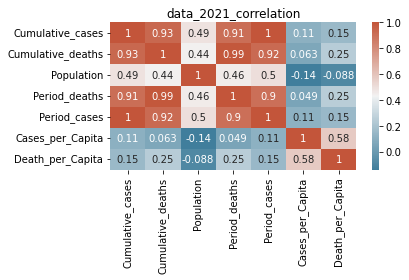

In [5]:
corr2(po,'data_2021_correlation')

,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
728,2021-12-31,Afghanistan,EMRO,158059,7356,38041754,5155.0,105546.0,277.447775,13.550900
1796,2021-12-31,Albania,EURO,209516,3215,2854191,2034.0,151200.0,5297.473084,71.263626
2864,2021-12-31,Algeria,AFRO,218037,6271,43053054,3515.0,118427.0,275.072240,8.164345
3932,2021-12-31,Andorra,EURO,23122,140,77142,56.0,15073.0,19539.291177,72.593399
5000,2021-12-31,Angola,AFRO,76787,1757,31825295,1352.0,59234.0,186.122391,4.248193
...,...,...,...,...,...,...,...,...,...,...
180152,2021-12-31,Uruguay,AMRO,410311,6168,3461734,5994.0,391831.0,11318.922829,173.150219
181220,2021-12-31,Uzbekistan,EURO,198903,1485,33580650,871.0,121777.0,362.640390,2.593756
182288,2021-12-31,Yemen,EMRO,10126,1984,29161922,1373.0,8023.0,27.511904,4.708194
183356,2021-12-31,Zambia,AFRO,249193,3730,17861030,3342.0,228468.0,1279.142356,18.711127


execution time = 34.22602868080139


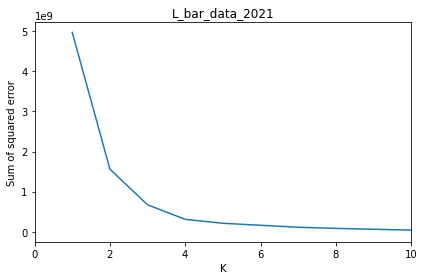

In [6]:
SSE_plot(po,'Cases_per_Capita','Death_per_Capita','L_bar_data_2021')

### Clustering analysis

The code calls two functions, `k_means()` and `tree()`, to perform cluster analysis on the cleaned COVID-19 case data stored in the 'wo' DataFrame.

The `k_means()` function performs k-means clustering on the 'Cases_per_Capita' and 'Death_per_Capita' columns of the 'wo' DataFrame, using 4 clusters, number decided by looking at the SSE plot, this is  a higher number respect to the previous analysis on South East Asia.

The `tree()` function performs hierarchical clustering on the 'po' DataFrame, using the linkage method, a method of grouping similar data points into clusters by building a hierarchy of clusters. 



,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita,cluster
728,2021-12-31,Afghanistan,EMRO,158059,7356,38041754,5155.0,105546.0,0.011046,0.040272,2
1796,2021-12-31,Albania,EURO,209516,3215,2854191,2034.0,151200.0,0.210907,0.211790,1
2864,2021-12-31,Algeria,AFRO,218037,6271,43053054,3515.0,118427.0,0.010951,0.024264,2
3932,2021-12-31,Andorra,EURO,23122,140,77142,56.0,15073.0,0.777914,0.215742,3
5000,2021-12-31,Angola,AFRO,76787,1757,31825295,1352.0,59234.0,0.007410,0.012625,2
...,...,...,...,...,...,...,...,...,...,...,...
180152,2021-12-31,Uruguay,AMRO,410311,6168,3461734,5994.0,391831.0,0.450638,0.514589,0
181220,2021-12-31,Uzbekistan,EURO,198903,1485,33580650,871.0,121777.0,0.014438,0.007708,2
182288,2021-12-31,Yemen,EMRO,10126,1984,29161922,1373.0,8023.0,0.001095,0.013992,2
183356,2021-12-31,Zambia,AFRO,249193,3730,17861030,3342.0,228468.0,0.050926,0.055608,2


execution time = 0.08877921104431152


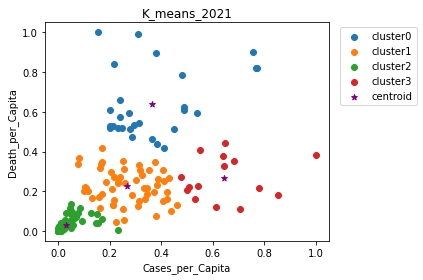

In [7]:
k_means(4,po,'Cases_per_Capita','Death_per_Capita','K_means_2021')

execution time = 0.04325985908508301


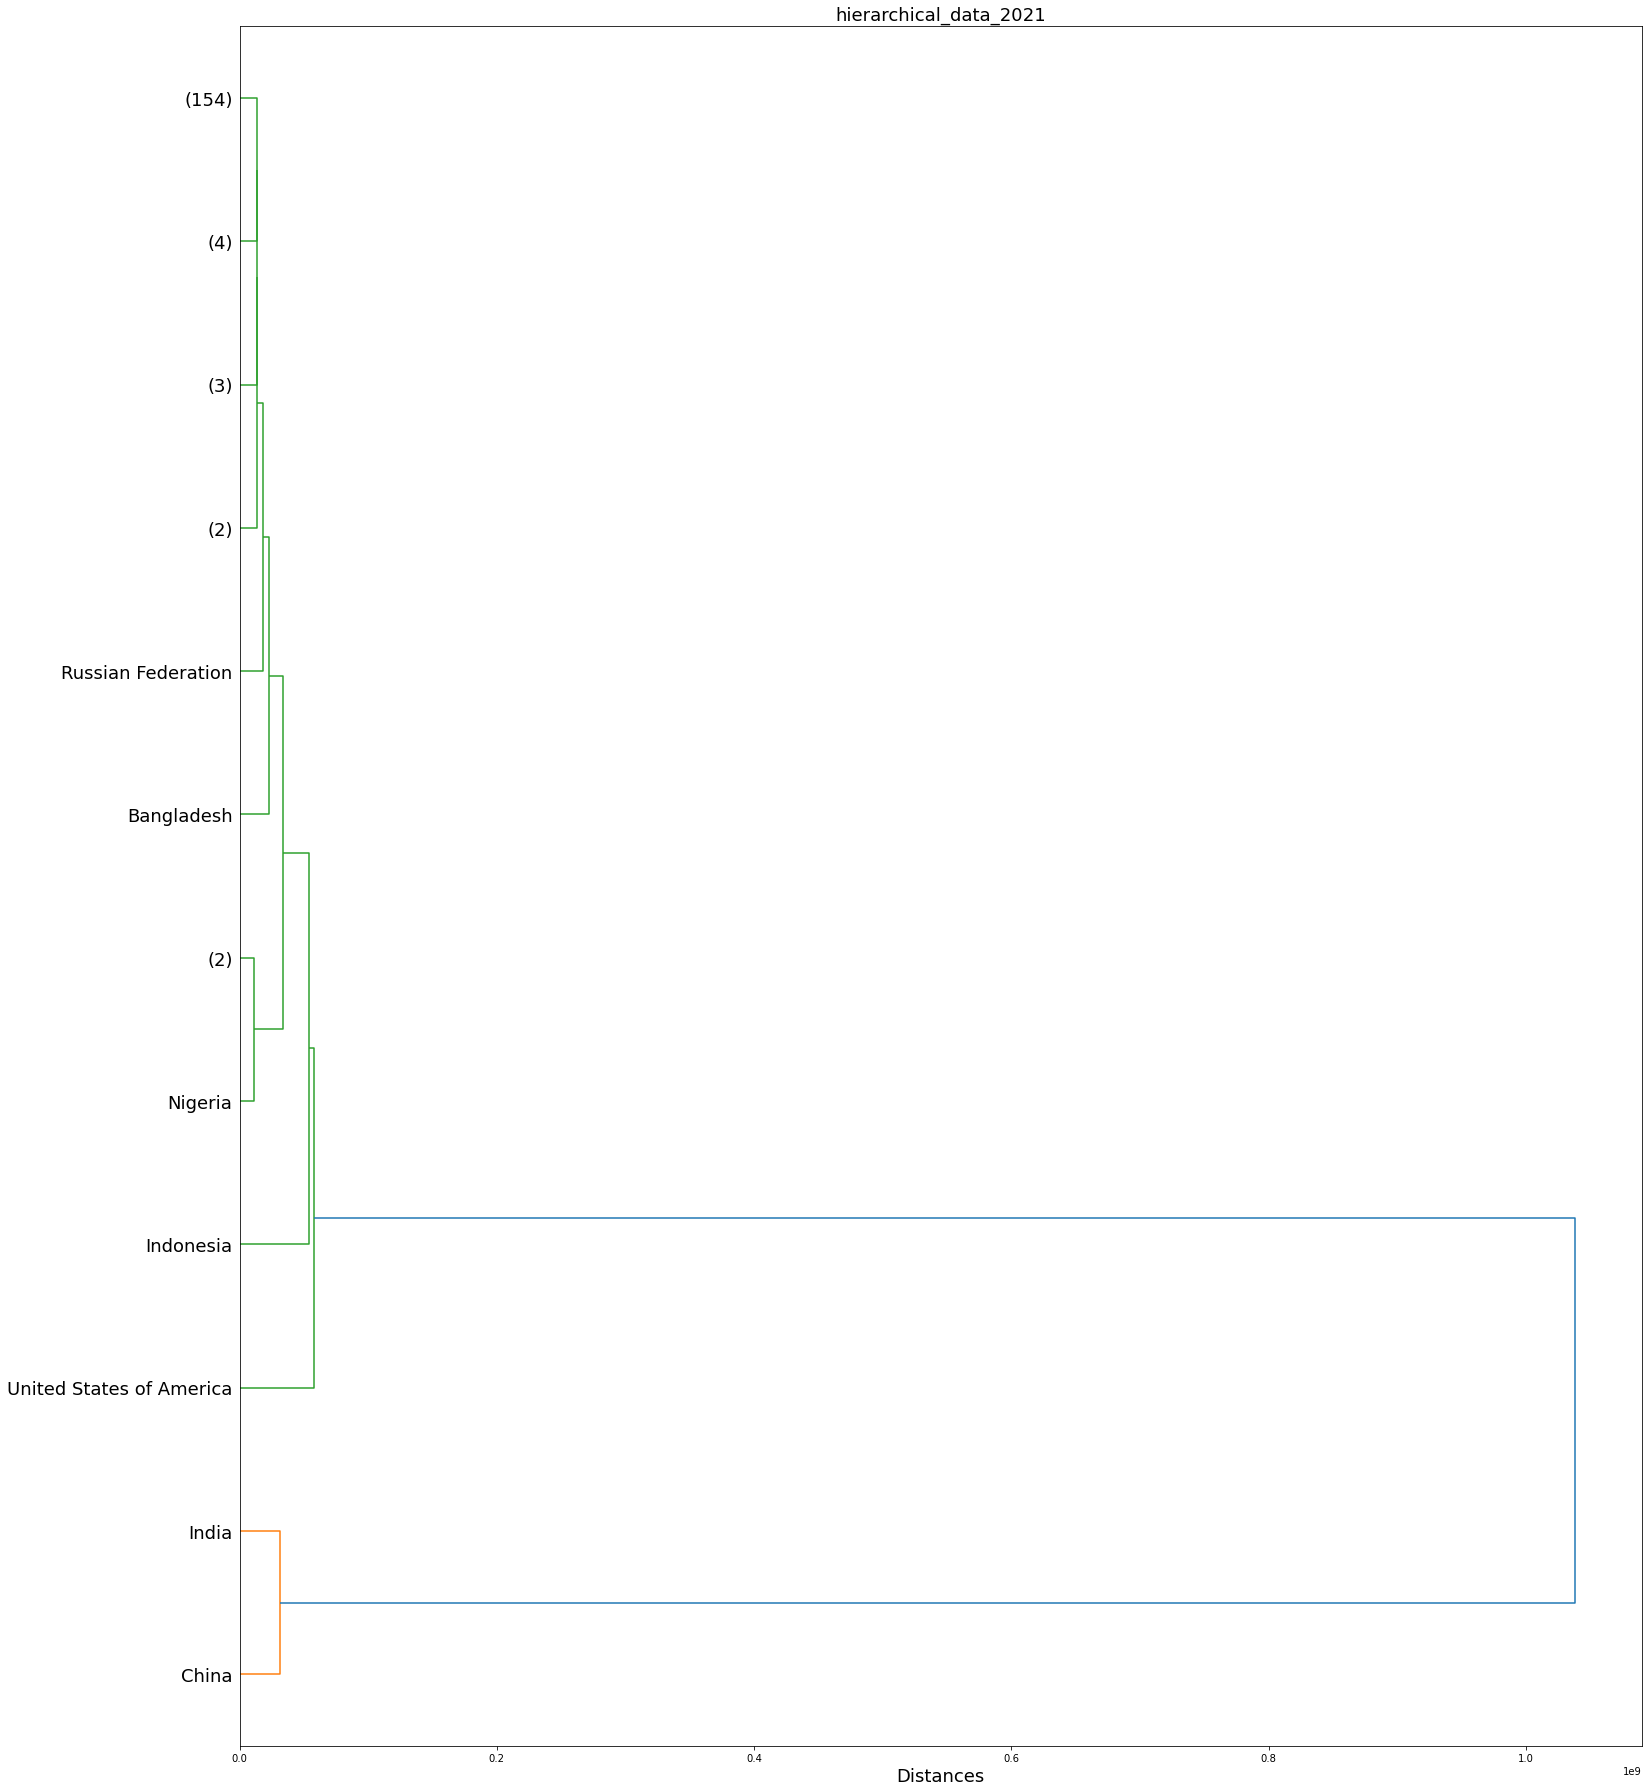

In [8]:
tree(po,23,25,18,'hierarchical_data_2021')

### World map

This code is using the folium library to create an interactive map and plot data points on it.

Then, it uses a for loop with the zip function to iterate through the latitude, longitude, country name, cumulative cases, cumulative deaths and population of the dataframe 'C'

It creates a CircleMarker for each iteration of the loop and adds it to the map object. The CircleMarker is created at the latitude and longitude coordinates, with a radius of 5, and a popup label that shows the country name.

It also creates a marker cluster and adds it to the map. Each marker in the cluster is created at the latitude and longitude coordinates, and has a popup with the country name, cumulative cases, cumulative deaths and population.

The map object is then displayed, with the markers and marker cluster plotted on it.

It creates a map showing the location of the countries and the cumulative cases, cumulative deaths and population of each country.

In [9]:
C=merge2[merge2['Date_reported']=='2021-12-31']

In [10]:
map_world (C, 'map_2021')